# The Spark Foundation - Internship

## TASK 2  : Prediction using Unsupervised ML
From the given 'IRIS' dataset predict the optimal number of clusters and represents it visually

### Author - Md. Muntasirul Hoque

### Importing Needed packages

In [2]:
# Importing libraries PANDAS,NUMPY for data manuplation, Matplotlib,seaborn module for Data Visualisation, sklearn for modelling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Suppress warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Reading The Data 


In [4]:
df= pd.read_csv('Iris.csv')
print("Data imported successfully")

Data imported successfully


### Data Exploration
Lets first have a descriptive exploration on our data.

In [5]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.shape

(150, 6)

There are  150 rows and 6 columns

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
df.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

Balance Dataset

In [10]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

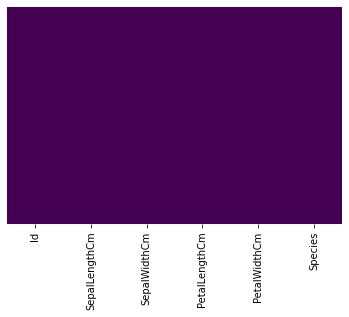

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no null values in the dataset

In [12]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

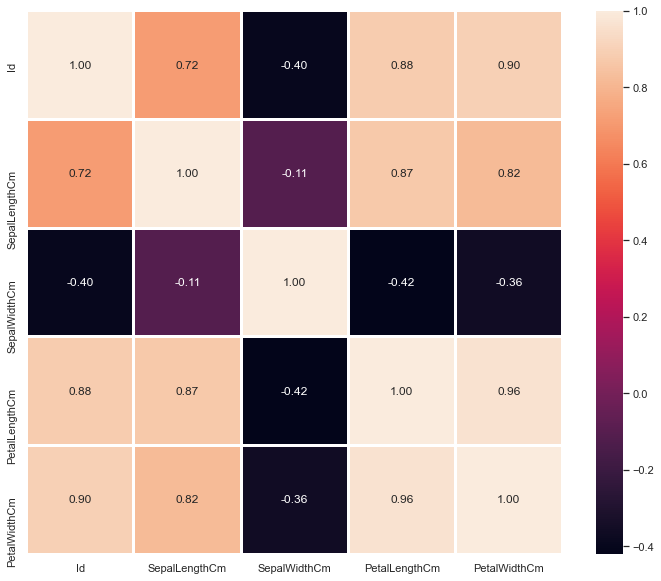

In [13]:
sns.set(rc={'figure.figsize':(12,10)})
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Visualization

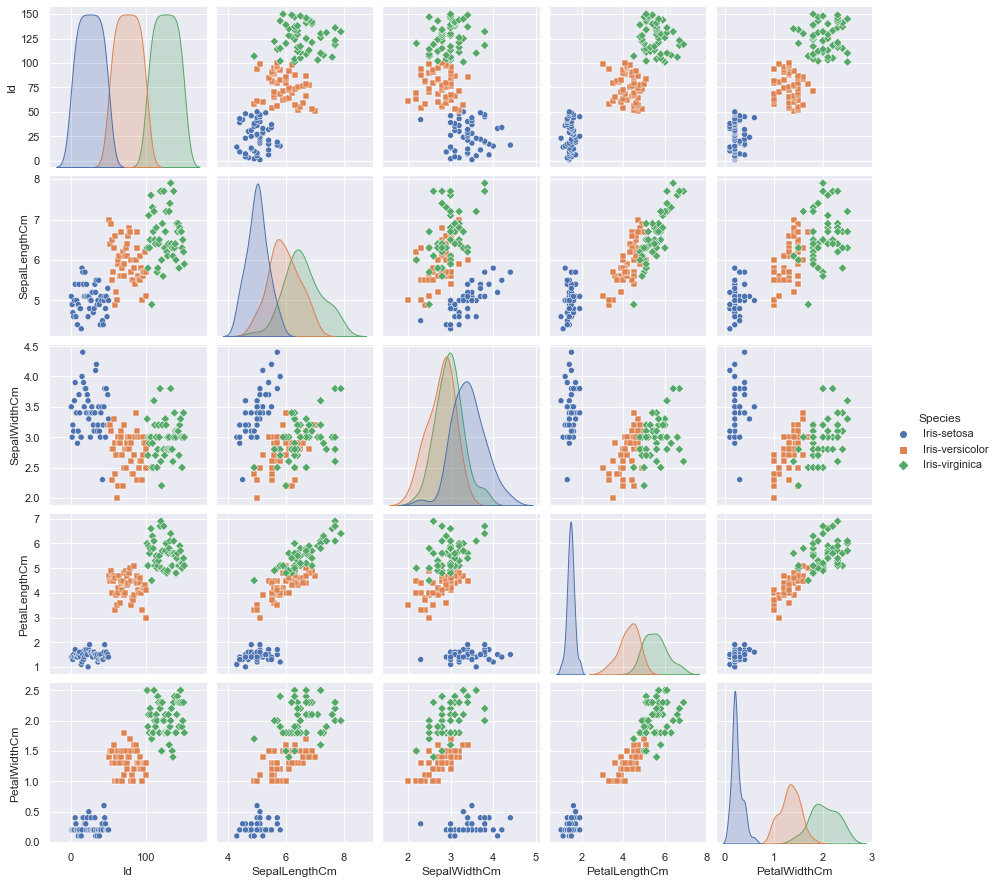

In [15]:
sns.pairplot(df, hue="Species", markers=["o", "s", "D"])

### Visualization Data Distribution

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


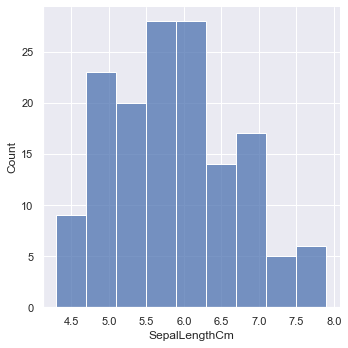

In [17]:
sns.displot(df['SepalLengthCm'])

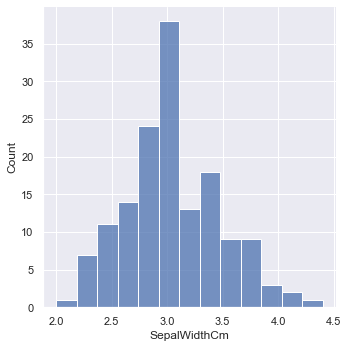

In [18]:
sns.displot(df['SepalWidthCm'])

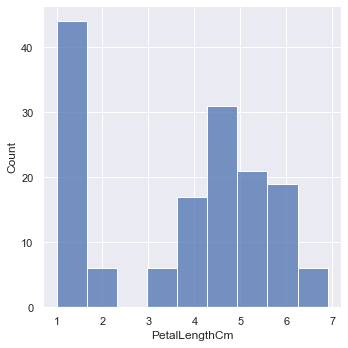

In [19]:
sns.displot(df['PetalLengthCm'])

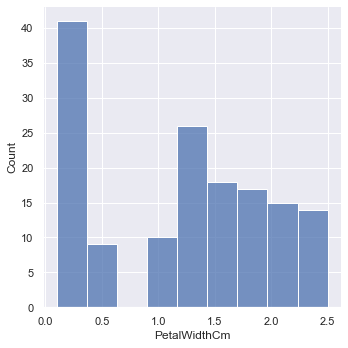

In [20]:
sns.displot(df['PetalWidthCm'])

### Outlier Checking

<AxesSubplot:xlabel='SepalLengthCm'>

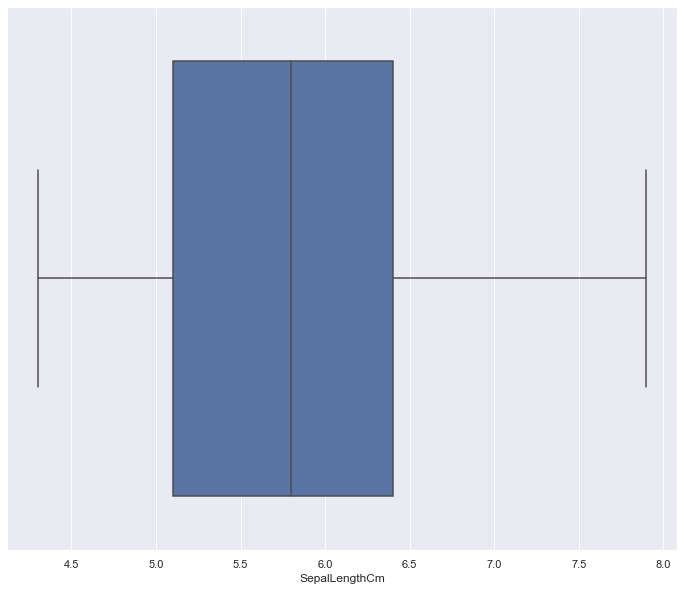

In [21]:
sns.boxplot(x=df['SepalLengthCm'],data=df)

<AxesSubplot:xlabel='PetalLengthCm'>

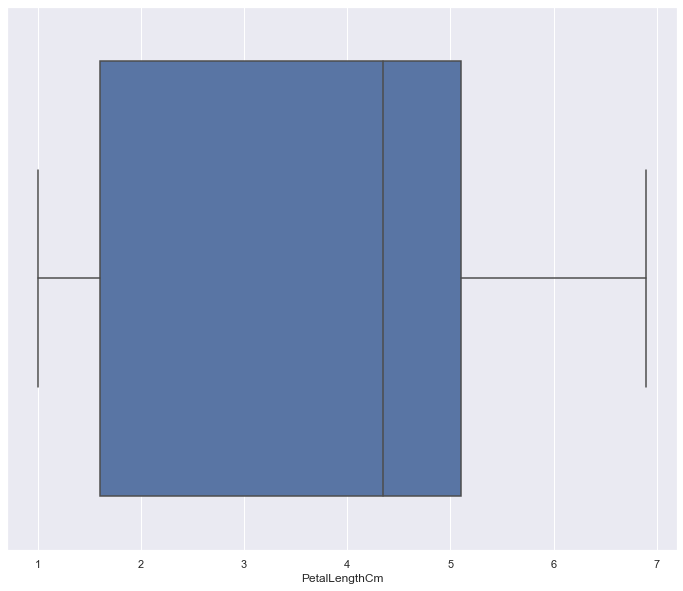

In [22]:
sns.boxplot(x=df['PetalLengthCm'],data=df)

<AxesSubplot:xlabel='PetalWidthCm'>

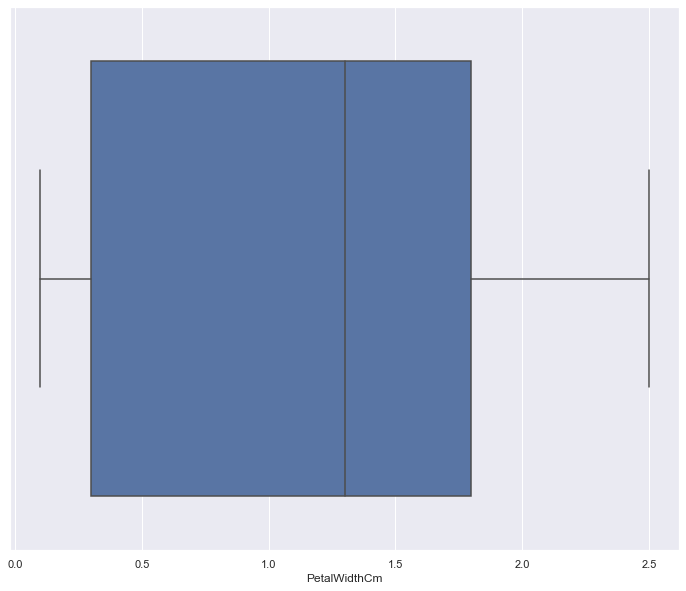

In [23]:
sns.boxplot(x=df['PetalWidthCm'],data=df)

<AxesSubplot:xlabel='SepalWidthCm'>

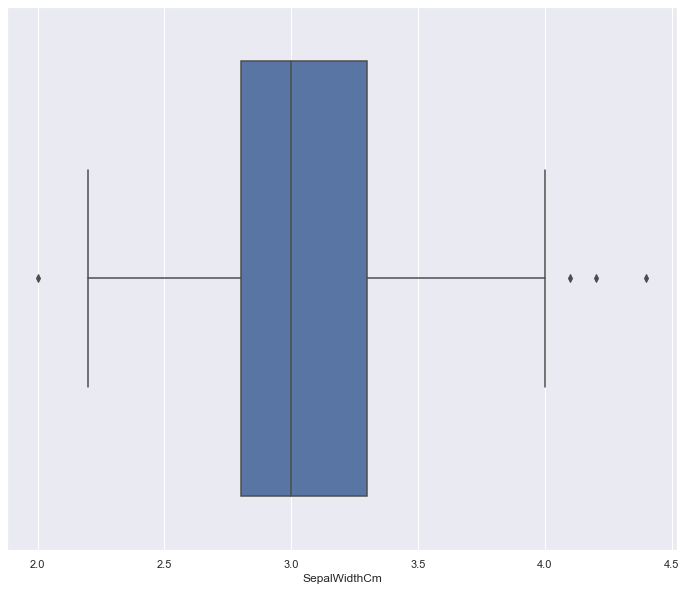

In [24]:
sns.boxplot(x=df['SepalWidthCm'],data=df)

Here we can see that only  SepalWidthCm  column has outliers and we have deal with it 

### Outliers treatment

In [25]:
IQR=df.SepalWidthCm.quantile(0.75)-df.SepalWidthCm.quantile(0.25)
IQR

0.5

In [26]:
lower_bridge=df.SepalWidthCm.quantile(0.25)-(IQR*1.5)
upper_bridge=df.SepalWidthCm.quantile(0.75)+(IQR*1.5)

print(lower_bridge),print(upper_bridge)

2.05
4.05


(None, None)

In [27]:
df.loc[df['SepalWidthCm']>=4.05,'SepalWidthCm']=4.05

In [28]:
df.loc[df['SepalWidthCm']<2.05,'SepalWidthCm']=2.05

<AxesSubplot:xlabel='SepalWidthCm'>

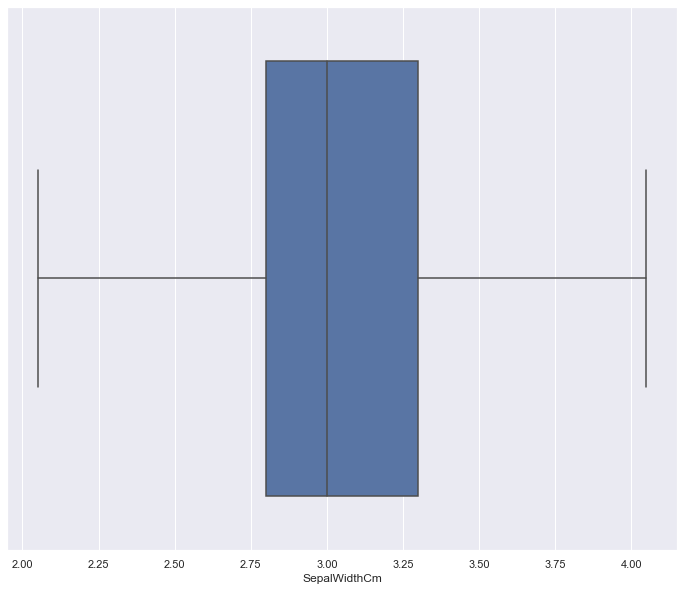

In [29]:
sns.boxplot(x=df['SepalWidthCm'],data=df)


There is no outlier now

### Scaling data 

In [30]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
df1= ss.fit_transform(df.drop(['Species'], axis = 1))
df1

array([[-1.72054204e+00, -9.00681170e-01,  1.06572221e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.69744751e+00, -1.14301691e+00, -1.20170457e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.67435299e+00, -1.38535265e+00,  3.54186609e-01,
        -1.39813811e+00, -1.31297673e+00],
       [-1.65125846e+00, -1.50652052e+00,  1.17008076e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.62816394e+00, -1.02184904e+00,  1.30290074e+00,
        -1.34127240e+00, -1.31297673e+00],
       [-1.60506942e+00, -5.37177559e-01,  2.01443634e+00,
        -1.17067529e+00, -1.05003079e+00],
       [-1.58197489e+00, -1.50652052e+00,  8.28543675e-01,
        -1.34127240e+00, -1.18150376e+00],
       [-1.55888037e+00, -1.02184904e+00,  8.28543675e-01,
        -1.28440670e+00, -1.31297673e+00],
       [-1.53578584e+00, -1.74885626e+00, -3.57348990e-01,
        -1.34127240e+00, -1.31297673e+00],
       [-1.51269132e+00, -1.14301691e+00,  1.17008076e-01,
        -1.28440670e+00

In [31]:
df1 = pd.DataFrame(df1)
df1.columns =df.columns[:-1]

df1.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-1.720542,-0.900681,1.065722,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.674353,-1.385353,0.354187,-1.398138,-1.312977
3,-1.651258,-1.506521,0.117008,-1.284407,-1.312977
4,-1.628164,-1.021849,1.302901,-1.341272,-1.312977


In [32]:
x = df1.iloc[:, [0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
wcss

[600.0,
 241.51930120952028,
 161.13640045035262,
 133.82892055736426,
 111.21150939649709,
 91.74065480579046,
 82.0046055563617,
 73.47885974926973,
 64.9162689828531,
 59.24404282026982]

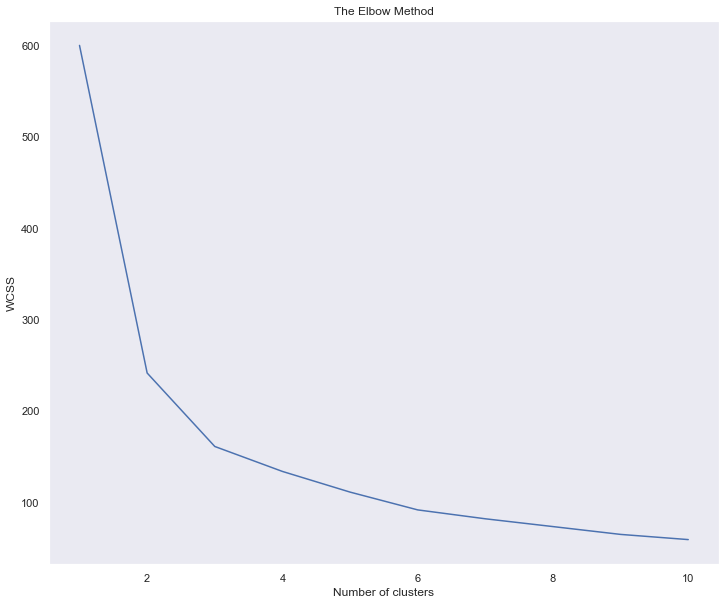

In [33]:

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

From the above curve we can see that the optimum clusters is where the elbow occurs so it is called as Elbow Method.It occurs when WCSS doesn't decrease significantly with every iteration. So, here we choose the number of clusters as "3"


### KMeans with K=3

In [34]:
kmeans= KMeans(n_clusters= 3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans= kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

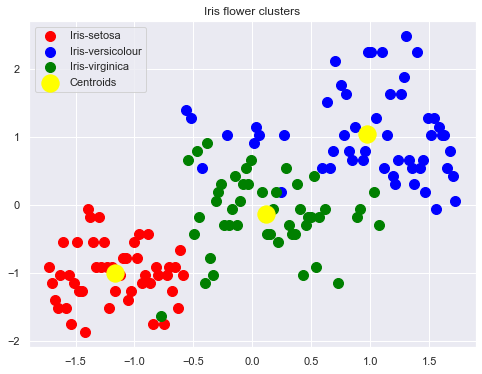

In [35]:
plt.figure(figsize = (8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Iris flower clusters')
plt.legend()
plt.show()